In [83]:
import vonenet
import torchvision
import torch
import numpy as np
import matplotlib.pyplot as plt

In [84]:
# Load V1 model
v1_model = vonenet.get_model(model_arch=None, pretrained=False, noise_mode=None).module

# v1_model = vonenet.get_model(model_arch=None, pretrained=False, noise_mode=None, image_size=32, visual_degrees=3, sf_max=5, stride=1, ksize=15).module
# v1_model = vonenet.get_model(model_arch='resnet50_ns', pretrained=True).module

print(v1_model)

Neuronal distributions gabor parameters
Model:  VOneNet
VOneBlock(
  (simple_conv_q0): GFB()
  (simple_conv_q1): GFB()
  (simple): ReLU(inplace=True)
  (complex): Identity()
  (gabors): Identity()
  (noise): ReLU(inplace=True)
  (output): Identity()
)


In [99]:
data_path = '/braintree/data2/active/common/imagenet_raw/val'

bsize = 16
crop = 256 # 48  256
px = 224 # 32  224

normalize = torchvision.transforms.Normalize(mean=[0.5, 0.5, 0.5],
                                             std=[0.5, 0.5, 0.5])
dataset = torchvision.datasets.ImageFolder(data_path,
    torchvision.transforms.Compose([
        torchvision.transforms.Resize(crop),  
        torchvision.transforms.CenterCrop(px),  
        torchvision.transforms.ToTensor(),
        normalize,
    ]))

data_loader = torch.utils.data.DataLoader(dataset, batch_size=bsize, shuffle=True, num_workers=20, pin_memory=True)

dataloader_iterator = iter(data_loader)

In [100]:
X, _ = next(dataloader_iterator)
print(X.shape)

torch.Size([16, 3, 224, 224])


In [101]:
activations = v1_model(X)
print(activations.shape)

torch.Size([16, 512, 56, 56])


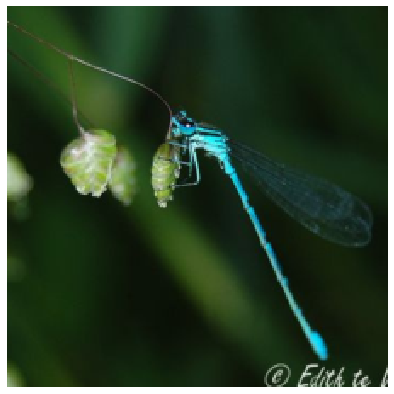

In [102]:
im_ind=15

input_im = np.moveaxis(X[im_ind].numpy(),0,-1)
input_im = input_im/2 +0.5
    
fig, ax = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(7,7)
im_h=ax.imshow(input_im)
im_h.set_clim([0, 1])
ax.set_axis_off()
plt.show()

In [103]:
np.argsort(np.std(activations[im_ind].numpy().reshape((512, -1)), axis=1))

array([480, 242, 116, 255, 393,  89, 154, 246, 286, 224, 254,   1, 500,
       103, 153,  55, 426,  32, 259, 245, 503, 216,  87, 348, 472, 108,
       168, 140, 206, 198, 157, 249, 196,  76,  57, 295, 336, 177, 112,
       120,  49, 274, 438, 199,  19,  17, 221,  63,  62, 335, 363, 443,
        31, 142, 247,  99, 235, 285, 146, 294, 386,  34, 373, 150, 433,
       159, 172, 464, 179, 269, 355, 371, 132, 209,  16, 314, 323, 223,
       227, 402,  11,  67, 405, 147, 205,  45,  43, 106, 207, 504, 330,
        97, 166, 144, 417, 276,   4,  74, 152, 316, 317,  82,  27,  10,
       290,  98, 488, 263,  52, 452, 378, 461, 441,  95, 479, 143, 457,
        75,  35, 467, 109, 100, 409, 485, 511, 501, 353, 502, 456, 498,
        92, 390,  36, 365, 398, 136, 219, 345, 305, 362, 413, 463,  38,
       312, 420, 325, 324, 251, 510, 300,  60, 240,  59, 396, 354, 389,
       465, 180,   8,   2,  64, 165, 442, 131,  70, 307, 232, 352,  41,
       191, 408, 430, 265,  18, 505, 289, 424,   5, 282,  79, 12

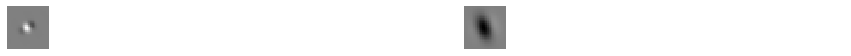

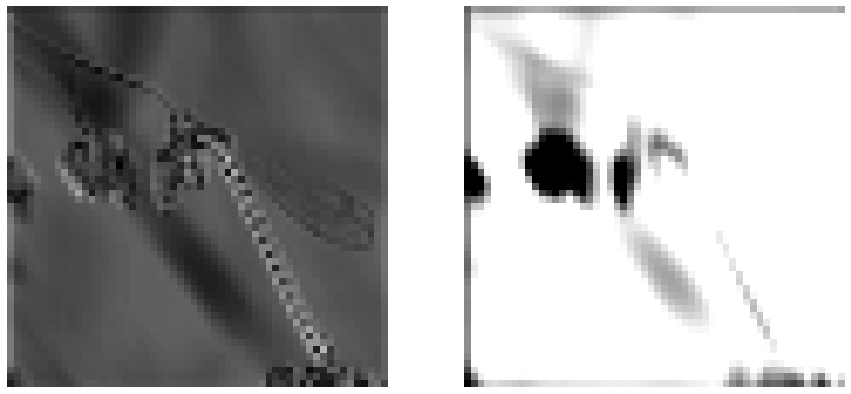

In [105]:

v1_ind=np.array([427, 208])

fig, ax = plt.subplots(nrows=1, ncols=len(v1_ind))
fig.set_size_inches(15,5)
for v1_i, v1_ind_ in enumerate(v1_ind):
    v1_k = v1_model.simple_conv_q0.weight[v1_ind_,:,:,:].numpy().mean(axis=0)
    v1_k = v1_k / np.amax(np.abs(v1_k))/2+0.5
    im_h=ax[v1_i].imshow(v1_k, cmap='gray')
    ax[v1_i].set_xlim([0, px])
    im_h.set_clim([0, 1])
    ax[v1_i].set_axis_off()
plt.show()


fig, ax = plt.subplots(nrows=1, ncols=len(v1_ind))
fig.set_size_inches(15,15)
max_activations = np.amax(activations[im_ind].numpy())/np.sqrt(2)
for v1_i, v1_ind_ in enumerate(v1_ind):
    v1_im = activations[im_ind,v1_ind_].numpy()
    v1_im = v1_im / max_activations
    im_h=ax[v1_i].imshow(v1_im, cmap='gray')
    im_h.set_clim([0, 1])
    ax[v1_i].set_axis_off()
plt.show()





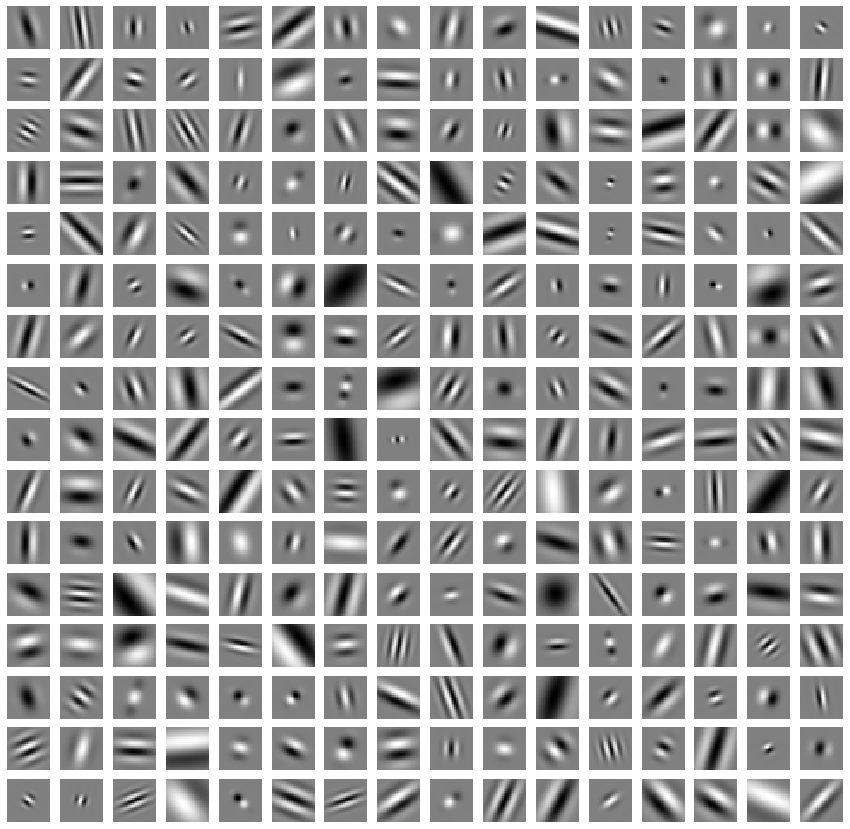

In [42]:
num_channels=256
max_columns = 16

fig, ax = plt.subplots(nrows=num_channels//max_columns, ncols=max_columns)

fig.set_size_inches(15,15)
for i in range(num_channels):
    v1_k = v1_model.simple_conv_q0.weight[i,:,:,:].numpy().mean(axis=0)
    v1_k = v1_k / np.amax(np.abs(v1_k))/2+0.5
    im_h=ax[i//max_columns, np.mod(i,max_columns)].imshow(v1_k, cmap='gray')
#     ax[i//num_channels, np.mod(i,num_channels)].set_xlim([0, 223])
    im_h.set_clim([0, 1])
    ax[i//max_columns, np.mod(i,max_columns)].set_axis_off()
plt.show()

In [91]:
# Nyquist

visual_degrees = 8
image_size = 224

nyquist_f = 1/(visual_degrees/image_size)/2 / np.sqrt(2)

print(nyquist_f)

9.899494936611665
